In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Question 1

In [2]:
df1 = pd.read_csv('Group_11_Question_1_Data.csv', index_col=0)
df1

,Period 1,Period 2
0,27.680136,12.336870
1,32.914177,11.868782
2,30.806953,13.069898
3,33.417412,12.895928
4,22.121046,12.910894
5,22.487118,17.255720
6,26.722399,12.755438
7,31.507780,13.347216
8,25.720625,12.265099
9,23.742313,11.752333


In [4]:
df1.describe()

,Period 1,Period 2
count,20.000000,20.000000
mean,26.429001,12.755438
std,6.174648,1.310644
min,11.619726,11.239848
25%,23.946297,11.922177
50%,27.201267,12.534074
75%,30.982160,12.957735
max,33.417412,17.255720


In [46]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [47]:
check_normality(df1["Period 1"])
check_normality(df1["Period 2"])

p value:0.0188
Reject null hypothesis >> The data is not normally distributed
p value:0.0005
Reject null hypothesis >> The data is not normally distributed


In [53]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

# see F-test 

In [54]:
check_variance_homogeneity(df1["Period 1"], df1["Period 2"])

p value:0.0002
Reject null hypothesis >> The variances of the samples are different.


array([[<AxesSubplot:title={'center':'Period 1'}>,
        <AxesSubplot:title={'center':'Period 2'}>]], dtype=object)

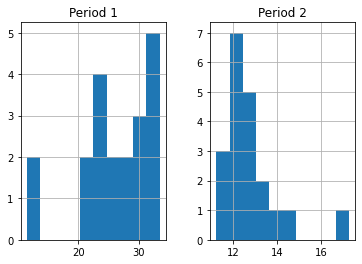

In [15]:
df1.hist()

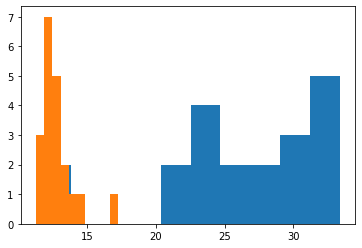

In [6]:
plt.hist(df1["Period 1"], bins=10)
plt.hist(df1["Period 2"], bins=10)
plt.show()

## Wilcoxon Rank-Sum / Mann Whitney U Test

Assuming:
1. The populations are continuous / ordinal
2. The probability density functions are of the same size and shape, but only shifted in location

(#2 is shaky, but possible if assuming that the measurment method provides the same distribution, but shifted, for Kappa regardless of type of wood)

Let

* H<sub>0</sub>: The distributions for Periods 1 and 2 are identical
* H<sub>1</sub>: The distributions for Periods 1 and 2 are different

A confidence level of 95% will be required to reject the null hypothesis in favor of the alternative

In [50]:
def test_mannwhtneyu_hypothesis(x1, x2):
    U, p = stats.mannwhitneyu(x1, x2)

    print("p value:%.10f" % p)
    if p <0.05:
        print("Reject null hypothesis >> The distributions for Periods 1 and 2 are different")
    else:
        print("Fail to reject null hypothesis >> The distributions for Periods 1 and 2 are identical")

test_mannwhtneyu_hypothesis(df1["Period 1"], df1["Period 2"])

p value:0.0000039874
Reject null hypothesis >> The distributions for Periods 1 and 2 are different


## Kruskal-Wallis H test

Extension of the Mann-Whitney

Let

* H<sub>0</sub>: The median Kappa for Periods 1 and 2 are identical
* H<sub>1</sub>: The median Kappa for Periods 1 and 2 are different

In [56]:
def test_kruskalwallish_hypothesis():
    H, p = stats.kruskal(df1["Period 1"], df1["Period 2"])

    print("p value:%.10f" % p)
    if p <0.05:
        print("Reject null hypothesis >> The median Kappa for Periods 1 and 2 are different")
    else:
        print("Fail to reject null hypothesis >> The median Kappa for Periods 1 and 2 are identical")

test_kruskalwallish_hypothesis()

p value:0.0000037358
Reject null hypothesis >> The median Kappa for Periods 1 and 2 are different


## F-test for variance

In [7]:
def f_test(x1: pd.Series, x2: pd.Series):

    # Ensures the F statistic is greater than 1, by assigning the larger standard deviation to the numerator
    if x1.std() < x2.std():
        x1, x2 = x2, x1

    # Calculate F statistic
    F = x1.std()**2 / x2.std()**2

    # Set degrees of freedom
    kwargs = dict(dfn= (x1.size -1), dfd= (x2.size -1))

    # Find critical value of F distribution at 95% confidence level
    F_crit = stats.f.ppf(q=1-0.05, **kwargs)

    if F > F_crit:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

f_test(df1["Period 1"], df1["Period 2"])

Reject null hypothesis >> The variances of the samples are different.


## Non-pooled t-test

Assumes the underlying distributions are normal

* H<sub>0</sub>: $\mu_1 = \mu_2$

In [8]:
def non_pooled_ttest(x1, x2):

    t, p = stats.ttest_ind(x1, x2, equal_var=False)

    print("p value:%.10f" % p)
    if p <0.05:
        print("Reject null hypothesis >> The distributions for Periods 1 and 2 are different")
    else:
        print("Fail to reject null hypothesis >> The distributions for Periods 1 and 2 are identical")


non_pooled_ttest(df1["Period 1"], df1["Period 2"])

p value:0.0000000039
Reject null hypothesis >> The distributions for Periods 1 and 2 are different


# Question 2

In [6]:
df2 = pd.read_csv("Group_11_Question_2_Data.csv", index_col=0)
df2

,White Liquor Carbonate,White Liquor TTA
0,17.840031,152.724304
1,17.367847,132.267677
2,20.163693,164.266577
3,15.864983,89.871505
4,18.346350,121.016272
5,17.887058,123.681328
6,14.897484,97.461028
7,17.057594,112.368003
8,16.736556,131.524967
9,17.542232,116.096851


<AxesSubplot:xlabel='White Liquor Carbonate'>

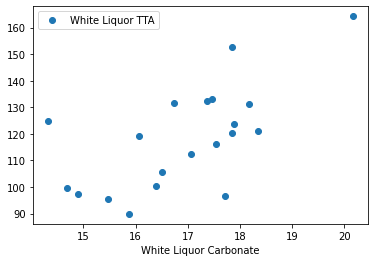

In [10]:
df2.plot(x="White Liquor Carbonate", style="o")